# Stata work with some preliminary data

In this workbook, I"m going to try and munge some of the data in stata directly, as the spatial component seems less critical for the overall analysis. In any event, we have:

In [111]:
import stata_setup

In [112]:
stata_setup.config("C:/Program Files/Stata18/", "se")

In [113]:
%%stata

use "C:\Users\mjbaker\OneDrive - CUNY\Documents\github\OldNYCHealth\Data\190313Mod.dta", clear


. 
. use "C:\Users\mjbaker\OneDrive - CUNY\Documents\github\OldNYCHealth\Data\1903
> 13Mod.dta", clear

. 


In [114]:
%%stata

describe


. 
. describe

Contains data from C:\Users\mjbaker\OneDrive - CUNY\Documents\github\OldNYCHeal
> th\Data\190313Mod.dta
 Observations:           934                  
    Variables:            21                  25 Jul 2017 13:27
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
year            int     %8.0g                 Year
borough         str2    %9s                   Borough
wards           str14   %14s                  Wards
areainacres     str9    %9s                   Area in acres
population~1900 str9    %9s                   Population by census of 1900
numberofperso~e float   %8.0g                 Number of persons to the acre
typhoidfever    int     %8.0g                 Typhoid fever
malarialfever   byte    %8.0g                 Malarial fever
smallpox        by

In [115]:
%%stata
sum


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        year |        934    1906.517    4.054456       1900       1913
     borough |          0
       wards |          0
 areainacres |          0
populat~1900 |          0
-------------+---------------------------------------------------------
numberofpe~e |        802    131.0208    149.8364         .8      696.7
typhoidfever |        756     9.80291    21.22593          0        365
malarialfe~r |        756    .8888889     2.55552          0         52
    smallpox |        756    .1111111    .8224231          0         17
     measles |        756    12.42593    27.77742          0        305
-------------+---------------------------------------------------------
scarletfever |        756    12.51455    27.07211          0        446
whoopingco~h |        756    5.915344    15.09926          0        318
   diphteria |          0
pulmo

A first munging thing to do is fix all those variables that are non-numeric that should be numbers. We have, for example:

In [116]:
%%stata

replace pulmonaryt = subinstr(pulmonaryt, ",", "", .)
destring pulmonaryt, replace

replace diphteria = subinstr(diphteria, ",", "", .)
destring diphteria, replace

replace diarrheald = subinstr(diarrheald, ",", "", .)
destring diarrheald, replace

replace allcauses = subinstr(allcauses, ",", "", .)
destring allcauses, replace

replace deathsinin = subinstr(deathsinin, ",", "", .)
destring deathsinin, replace

replace deathsofch = subinstr(deathsofch, ",", "", .)
destring deathsofch, replace

replace areainacres = subinstr(areainacres, ",", "", .)
destring areainacres, replace

replace populat = subinstr(populat, ",", "", .)
destring populat, replace



. 
. replace pulmonaryt = subinstr(pulmonaryt, ",", "", .)
(9 real changes made)

. destring pulmonaryt, replace
pulmonarytuberculosisphithisis: all characters numeric; replaced as int
(201 missing values generated)

. 
. replace diphteria = subinstr(diphteria, ",", "", .)
(1 real change made)

. destring diphteria, replace
diphteria: all characters numeric; replaced as int
(178 missing values generated)

. 
. replace diarrheald = subinstr(diarrheald, ",", "", .)
(1 real change made)

. destring diarrheald, replace
diarrhealdiseases: all characters numeric; replaced as int
(178 missing values generated)

. 
. replace allcauses = subinstr(allcauses, ",", "", .)
(244 real changes made)

. destring allcauses, replace
allcauses: all characters numeric; replaced as long
(178 missing values generated)

. 
. replace deathsinin = subinstr(deathsinin, ",", "", .)
(43 real changes made)

. destring deathsinin, replace
deathsininstitution: all characters numeric; replaced as int
(471 missing val

In [117]:
%%stata

sum year


. 
. sum year

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        year |        934    1906.517    4.054456       1900       1913

. 


So, this dataset is about 13 years of data, which we orginally grabbed to see if we could detect a drop in infant mortality. That doesn't seem feasible, but at least we can fit some preliminary models and see where that gets us. Note that the Ward Data is a little squirrely, and that there are some columns we don't really need. Here are the wards:

In [118]:
%%stata

tab wards


. 
. tab wards

         Wards |      Freq.     Percent        Cum.
---------------+-----------------------------------
    Eighteenth |         28        3.00        3.00
        Eighth |         28        3.00        6.00
      Eleventh |         28        3.00        8.99
     Fifteenth |         28        3.00       11.99
         Fifth |         56        6.00       17.99
         First |         56        6.00       23.98
    Fourteenth |         28        3.00       26.98
        Fourth |         56        6.00       32.98
    Nineteenth |         28        3.00       35.97
         Ninth |         28        3.00       38.97
        Second |         56        6.00       44.97
   Seventeenth |         28        3.00       47.97
       Seventh |         28        3.00       50.96
     Sixteenth |         28        3.00       53.96
         Sixth |         28        3.00       56.96
         Tenth |         28        3.00       59.96
         Third |         56        6.00       6

In [119]:
%%stata

drop if wards == "Total"


. 
. drop if wards == "Total"
(4 observations deleted)

. 


As I don't quite understand what the redundancy in the twelfth ward is, let's just drop it. So, we have the following basic idea, which really gets us rolling. 

In [120]:
%%stata

drop if ward=="TwelfthC" | ward=="TwelfthE" | ward=="TwelfthN" | ward == "TwelfthW"

replace ward="Twenty-third" if ward=="Twenty-Third"
tab wards


. 
. drop if ward=="TwelfthC" | ward=="TwelfthE" | ward=="TwelfthN" | ward == "Twe
> lfthW"
(8 observations deleted)

. 
. replace ward="Twenty-third" if ward=="Twenty-Third"
(1 real change made)

. tab wards

         Wards |      Freq.     Percent        Cum.
---------------+-----------------------------------
    Eighteenth |         28        3.04        3.04
        Eighth |         28        3.04        6.07
      Eleventh |         28        3.04        9.11
     Fifteenth |         28        3.04       12.15
         Fifth |         56        6.07       18.22
         First |         56        6.07       24.30
    Fourteenth |         28        3.04       27.33
        Fourth |         56        6.07       33.41
    Nineteenth |         28        3.04       36.44
         Ninth |         28        3.04       39.48
        Second |         56        6.07       45.55
   Seventeenth |         28        3.04       48.59
       Seventh |         28        3.04       51.63
     Sixt

So, we are left with a bunch of wards that are in different Boroughs. Let's make a variable that captures wards and boroughs:

In [121]:
%%stata

gen wb = wards + borough
tab wb


. 
. gen wb = wards + borough

. tab wb

              wb |      Freq.     Percent        Cum.
-----------------+-----------------------------------
    EighteenthBR |         14        1.52        1.52
    EighteenthMA |         14        1.52        3.04
        EighthBR |         14        1.52        4.56
        EighthMA |         14        1.52        6.07
      EleventhBR |         14        1.52        7.59
      EleventhMA |         14        1.52        9.11
     FifteenthBR |         14        1.52       10.63
     FifteenthMA |         14        1.52       12.15
         FifthBR |         14        1.52       13.67
         FifthMA |         14        1.52       15.18
         FifthQU |         14        1.52       16.70
         FifthRI |         14        1.52       18.22
         FirstBR |         14        1.52       19.74
         FirstMA |         14        1.52       21.26
         FirstQU |         14        1.52       22.78
         FirstRI |         14        1.5

Now, we have unique data going back for all of these wards. Note that the 12th ward has 12 observations, so our shenanigans with the dropping of the finely grained ward data has resulted in fewer observations here. 

⭐ One thing: why is this data yearly, and shouldn't it/couldn't it be quarterly? Generate a unique id for each borough/ward combination. 

Numerical region identifier:

In [122]:
%%stata

egen wbid = group(wb)
sum wbid


. 
. egen wbid = group(wb)

. sum wbid

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        wbid |        922    33.46204     19.0639          1         66

. 


So, we have a total of 66 cross-sectional observations. Let's first just look at all causes of death over this time, which first requires that we destring the requisite variable. Let's set our time series and cross-sectional variables now, and see where this gets us.

We can summarize a few variables here, just to capture the variation within and between the wards. Let's look at this for a few select variables - all deaths, diarrheal deaths, deaths in institutions, children deaths, and maybe one that it rather infrequent, such as meningitis.

In [123]:
%%stata

xtset wbid year, yearly
xtsum allcause diarrheal deathsinin deathsofch cerebro


. 
. xtset wbid year, yearly

Panel variable: wbid (unbalanced)
 Time variable: year, 1900 to 1913
         Delta: 1 year

. xtsum allcause diarrheal deathsinin deathsofch cerebro

Variable         |      Mean   Std. dev.       Min        Max |    Observations
-----------------+--------------------------------------------+----------------
allcau~s overall |  1119.433   1470.449         21      11409 |     N =     746
         between |             1490.471      39.75    10060.1 |     n =      66
         within  |             283.0579  -2544.931    4722.35 | T-bar =  11.303
                 |                                            |
diarrh~s overall |  88.81769   114.3995          0        883 |     N =     746
         between |              113.781   1.083333      721.8 |     n =      66
         within  |             27.29706  -82.01564   315.9844 | T-bar =  11.303
                 |                                            |
deaths~n overall |  361.7727   808.8095          0

Let's just scale some of the variables that we have, for ease of analysis:

In [124]:
%%stata

gen lnpop = ln(populat)
gen lnacr = ln(area)
gen year2 = year*year
tab year, gen(yd)


. 
. gen lnpop = ln(populat)
(132 missing values generated)

. gen year2 = year*year

. tab year, gen(yd)

      Year  |      Freq.     Percent        Cum.
------------+-----------------------------------
       1900 |         66        7.16        7.16
       1901 |         66        7.16       14.32
       1902 |         66        7.16       21.48
       1903 |         66        7.16       28.63
       1904 |         66        7.16       35.79
       1905 |         66        7.16       42.95
       1906 |         66        7.16       50.11
       1907 |         66        7.16       57.27
       1908 |         66        7.16       64.43
       1909 |         66        7.16       71.58
       1910 |         66        7.16       78.74
       1911 |         66        7.16       85.90
       1912 |         65        7.05       92.95
       1913 |         65        7.05      100.00
------------+-----------------------------------
      Total |        922      100.00

. 


The above is not great because population just jumps once during the whole time, so we should be careful with that or use some technique to blend the census populations. Anyways...

In [139]:
%%stata

xtreg allcause year year2 lnpop lnar, fe


. 
. xtreg allcause year year2 lnpop lnar, fe

Fixed-effects (within) regression               Number of obs     =        746
Group variable: wbid                            Number of groups  =         66

R-squared:                                      Obs per group:
     Within  = 0.0650                                         min =         10
     Between = 0.3050                                         avg =       11.3
     Overall = 0.2943                                         max =         12

                                                F(4, 676)         =      11.76
corr(u_i, Xb) = 0.3243                          Prob > F          =     0.0000

------------------------------------------------------------------------------
   allcauses | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        year |   17582.75   4293.676     4.10   0.000     9152.204    26013.29
       year2 |  -

In [141]:
%%stata

xtreg diarrhea year year2 lnpop lnar, fe


. 
. xtreg diarrhea year year2 lnpop lnar, fe

Fixed-effects (within) regression               Number of obs     =        746
Group variable: wbid                            Number of groups  =         66

R-squared:                                      Obs per group:
     Within  = 0.2179                                         min =         10
     Between = 0.3346                                         avg =       11.3
     Overall = 0.2949                                         max =         12

                                                F(4, 676)         =      47.08
corr(u_i, Xb) = 0.3576                          Prob > F          =     0.0000

------------------------------------------------------------------------------
diarrheald~s | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        year |   4054.987   378.7085    10.71   0.000       3311.4    4798.573
       year2 |  -

In [142]:
%%stata

xtreg deathsofch year lnpop lnar, fe


. 
. xtreg deathsofch year lnpop lnar, fe

Fixed-effects (within) regression               Number of obs     =        724
Group variable: wbid                            Number of groups  =         66

R-squared:                                      Obs per group:
     Within  = 0.0745                                         min =          9
     Between = 0.3112                                         avg =       11.0
     Overall = 0.2853                                         max =         11

                                                F(3, 655)         =      17.58
corr(u_i, Xb) = 0.4047                          Prob > F          =     0.0000

------------------------------------------------------------------------------
deathsofch~s | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        year |  -6.790084    .963288    -7.05   0.000    -8.681589    -4.89858
       lnpop |   45.6

In [143]:
%%stata 
xtnbreg deathsofch year lnpop lnar


Fitting negative binomial (constant dispersion) model:

Iteration 0:  Log likelihood = -18545.933  
Iteration 1:  Log likelihood = -18544.008  
Iteration 2:  Log likelihood = -18544.007  

Iteration 0:  Log likelihood = -59223.717  
Iteration 1:  Log likelihood = -6038.0673  
Iteration 2:  Log likelihood = -5046.9603  
Iteration 3:  Log likelihood = -4969.7005  
Iteration 4:  Log likelihood =  -4969.052  
Iteration 5:  Log likelihood = -4969.0517  

Iteration 0:  Log likelihood = -4969.0517  
Iteration 1:  Log likelihood = -4563.2587  
Iteration 2:  Log likelihood = -4343.4528  
Iteration 3:  Log likelihood = -4310.7872  
Iteration 4:  Log likelihood = -4310.5803  
Iteration 5:  Log likelihood = -4310.5802  

Fitting full model:

Iteration 0:  Log likelihood = -5682.5907  (not concave)
Iteration 1:  Log likelihood = -4480.6548  (not concave)
Iteration 2:  Log likelihood = -4015.5002  
Iteration 3:  Log likelihood = -3941.1875  
Iteration 4:  Log likelihood = -3845.5261  
Iteration 5: 

In [146]:
%%stata 

xtnbreg deathsofch i.year lnpop lnar, fe


. 
. xtnbreg deathsofch i.year lnpop lnar, fe

Iteration 0:  Log likelihood =   -4361.25  (not concave)
Iteration 1:  Log likelihood = -3383.1447  
Iteration 2:  Log likelihood = -3197.9961  
Iteration 3:  Log likelihood = -3186.1477  
Iteration 4:  Log likelihood = -3185.8446  
Iteration 5:  Log likelihood = -3185.8444  

Conditional FE negative binomial regression          Number of obs    =    724
Group variable: wbid                                 Number of groups =     66

                                                     Obs per group:
                                                                  min =      9
                                                                  avg =   11.0
                                                                  max =     11

                                                     Wald chi2(12)    = 386.97
Log likelihood = -3185.8444                          Prob > chi2      = 0.0000

--------------------------------------------------

In [147]:
%%stata

xtnbreg allcause i.year lnpop lnar, fe


. 
. xtnbreg allcause i.year lnpop lnar, fe

Iteration 0:  Log likelihood = -11104.394  (not concave)
Iteration 1:  Log likelihood = -4452.8191  
Iteration 2:  Log likelihood = -4199.4387  
Iteration 3:  Log likelihood = -4170.3913  
Iteration 4:  Log likelihood = -4167.7021  
Iteration 5:  Log likelihood = -4167.6983  
Iteration 6:  Log likelihood = -4167.6983  

Conditional FE negative binomial regression          Number of obs    =    746
Group variable: wbid                                 Number of groups =     66

                                                     Obs per group:
                                                                  min =     10
                                                                  avg =   11.3
                                                                  max =     12

                                                     Wald chi2(13)    = 221.81
Log likelihood = -4167.6983                          Prob > chi2      = 0.0000

--------

In [148]:
%%stata

xtnbreg diarrhea i.year lnpop lnar, fe


. 
. xtnbreg diarrhea i.year lnpop lnar, fe

Iteration 0:  Log likelihood = -2759.9285  
Iteration 1:  Log likelihood = -2671.0998  
Iteration 2:  Log likelihood = -2594.1844  
Iteration 3:  Log likelihood =  -2578.043  
Iteration 4:  Log likelihood = -2577.4959  
Iteration 5:  Log likelihood = -2577.4939  
Iteration 6:  Log likelihood = -2577.4939  

Conditional FE negative binomial regression          Number of obs    =    746
Group variable: wbid                                 Number of groups =     66

                                                     Obs per group:
                                                                  min =     10
                                                                  avg =   11.3
                                                                  max =     12

                                                     Wald chi2(13)    = 596.27
Log likelihood = -2577.4939                          Prob > chi2      = 0.0000

---------------------

In [149]:
%%stata

xtnbreg cerebro i.year lnpop lnar, fe


. 
. xtnbreg cerebro i.year lnpop lnar, fe

Iteration 0:  Log likelihood = -1406.8659  
Iteration 1:  Log likelihood = -1385.1759  
Iteration 2:  Log likelihood = -1384.5722  
Iteration 3:  Log likelihood = -1384.5685  
Iteration 4:  Log likelihood = -1384.5685  

Conditional FE negative binomial regression         Number of obs    =     746
Group variable: wbid                                Number of groups =      66

                                                    Obs per group:
                                                                 min =      10
                                                                 avg =    11.3
                                                                 max =      12

                                                    Wald chi2(13)    = 2582.25
Log likelihood = -1384.5685                         Prob > chi2      =  0.0000

------------------------------------------------------------------------------
cerebrospi~s | Coefficient  Std.


. 
. xtline allcause if borough=="QU", overlay

. 


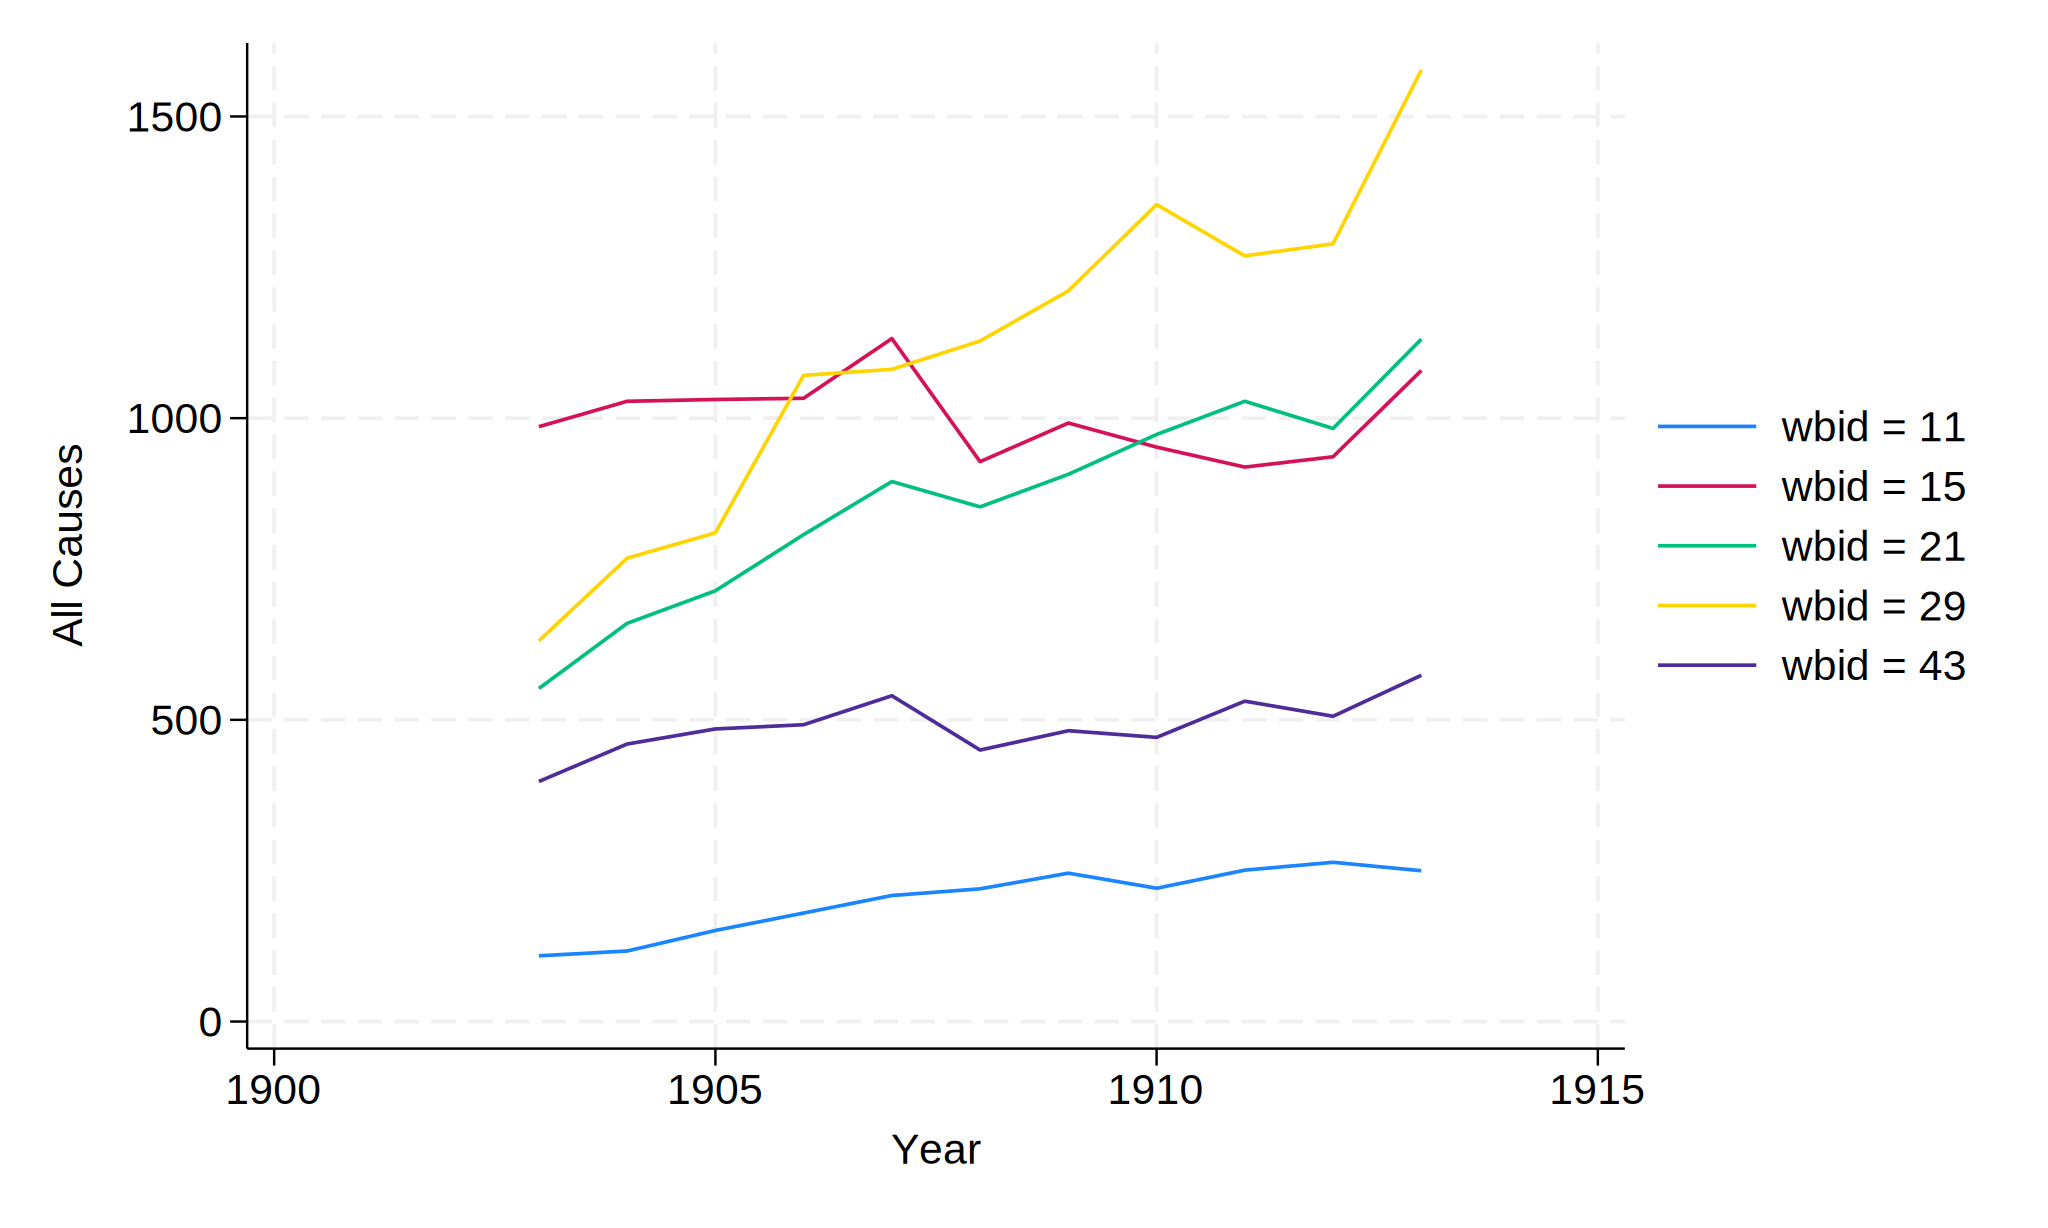

In [156]:
%%stata

xtline allcause if borough=="QU", overlay


. 
. xtline deathsofch if borough=="QU", overlay

. 


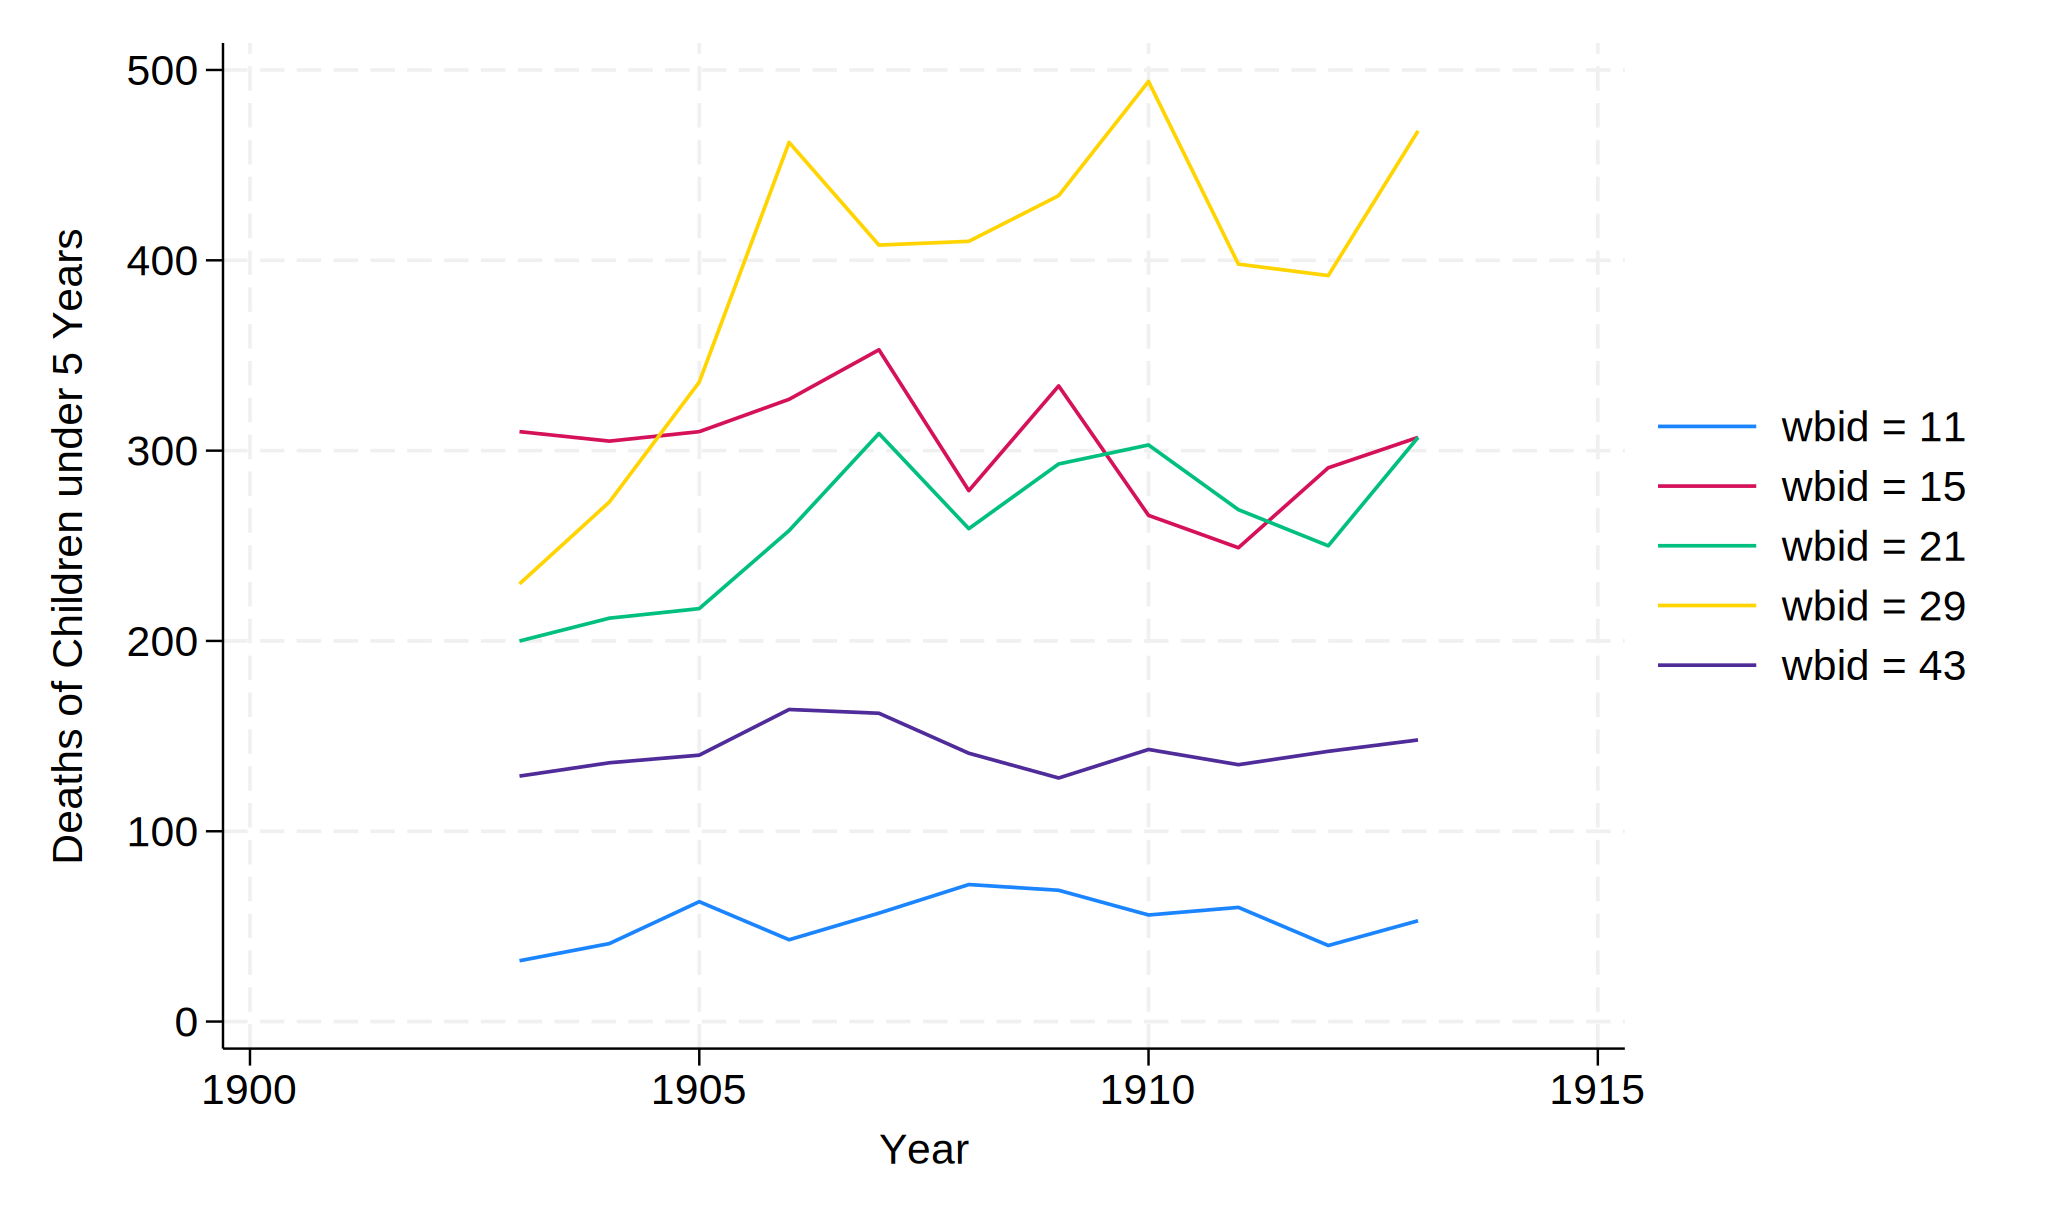

In [157]:
%%stata

xtline deathsofch if borough=="QU", overlay

In [159]:
%%stata

xtnbreg deathsofch i.year lnpop lnar if borough=="QU", fe


. 
. xtnbreg deathsofch i.year lnpop lnar if borough=="QU", fe

Iteration 0:  Log likelihood = -272.58881  (not concave)
Iteration 1:  Log likelihood = -240.33949  
Iteration 2:  Log likelihood = -220.03238  
Iteration 3:  Log likelihood = -217.54008  
Iteration 4:  Log likelihood = -217.26306  
Iteration 5:  Log likelihood = -217.26147  
Iteration 6:  Log likelihood = -217.26147  

Conditional FE negative binomial regression          Number of obs    =     55
Group variable: wbid                                 Number of groups =      5

                                                     Obs per group:
                                                                  min =     11
                                                                  avg =   11.0
                                                                  max =     11

                                                     Wald chi2(12)    =  70.12
Log likelihood = -217.26147                          Prob > chi2     